# Plotting with Matplotlib Animations

The general steps are as follow: 

1. Requires packages: ffmpeg, IPython, matplotlib
2. Import libraries
3. Create the fig, ax to store the plot
4. Set the plot limits for the x and y axes
5. Initialize the plot elements (line object in this example; unpacks a tuple returned by plot)
6. Set up the plot details (labels, etc.)
7. Define the initialization function (store the background of the animation in each frame)
8. Define the animation function (takes each frame and updates the plot elements)
9. Create the animation object (call the FuncAnimation method)
10. Save and embed for Jupyter notebook.

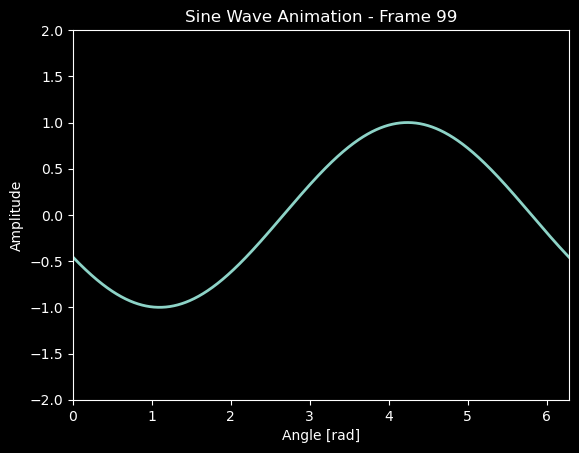

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Video

with plt.style.context('dark_background'):
    # Create a figure and axis where the frames will be displayed
    fig, ax = plt.subplots()
    
    # Set up plot limits
    ax.set_xlim(0, 2 * np.pi)
    ax.set_ylim(-2, 2)

    # Initialize a line object
    line, = ax.plot([], [], lw=2)

    # Set up plot details that don't need to update with each frame
    ax.set_xlabel("Angle [rad]")
    ax.set_ylabel("Amplitude")

    # Function to initialize the background of the animation
    def init():
        line.set_data([], [])
        return line,

    # Animation function called sequentially
    def animate(frame):
        x = np.linspace(0, 2 * np.pi, 1000)
        y = np.sin(x + 0.1 * frame)
        line.set_data(x, y)
        ax.set_title(f"Sine Wave Animation - Frame {frame}") # Add plot details that updte with each frame
        return line,

# Create animation object
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=100, interval=20, blit=True
)

# Save the animation as an MP4 using ffmpeg
ani.save("Anim.mp4", writer="ffmpeg", fps=30)

# Display the saved video in Jupyter Notebook (optional)
Video("Anim.mp4", embed=True)